In [1]:
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import itertools


import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))

In [3]:
corpus = pickle.load(open("pickle_files/corpus.pkl", "rb" ))

In [4]:
verbs_adverbs = pickle.load(open("pickle_files/verbs_adverbs.pkl", "rb" ))

In [5]:
simple_text = pickle.load(open("pickle_files/simple_text.pkl", "rb" ))

In [6]:
not_happening = pickle.load(open("pickle_files/not_happening.pkl", "rb" ))

In [2]:
how_can_this_happen = pickle.load(open("pickle_files/how_can_this_happen.pkl", "rb" ))

In [3]:
def count_letters(words):
    length = []
    for x in words:
        length.append(len(x))
    return sum(length)

In [4]:
count_letters(how_can_this_happen)

5885069

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   #token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.4)
cor_tfidf = tfidf.fit_transform(how_can_this_happen)

In [ ]:
lsa = TruncatedSVD(180, algorithm = 'arpack')
corpus_lsa = lsa.fit_transform(cor_tfidf)
corpus_lsa = Normalizer(copy=False).fit_transform(corpus_lsa)

In [ ]:
sum(lsa.explained_variance_ratio_)

In [ ]:
terms = tfidf.get_feature_names()

In [ ]:
for i, comp in enumerate(lsa.components_):
    Terms_in_Comp = zip(terms,comp)
    sorted_Terms = sorted(Terms_in_Comp, key = lambda x: x[1], reverse=True) [:10]
    print("Topic %d:" %i)
    for term in sorted_Terms:
        print(term[0])
    print(" ")

In [10]:
import os

os.system('say "Your move.....Commander"')

0

In [98]:
SSEs = []
Sil_coefs = []
for k in range(2, 141):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(corpus_lsa)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(corpus_lsa, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

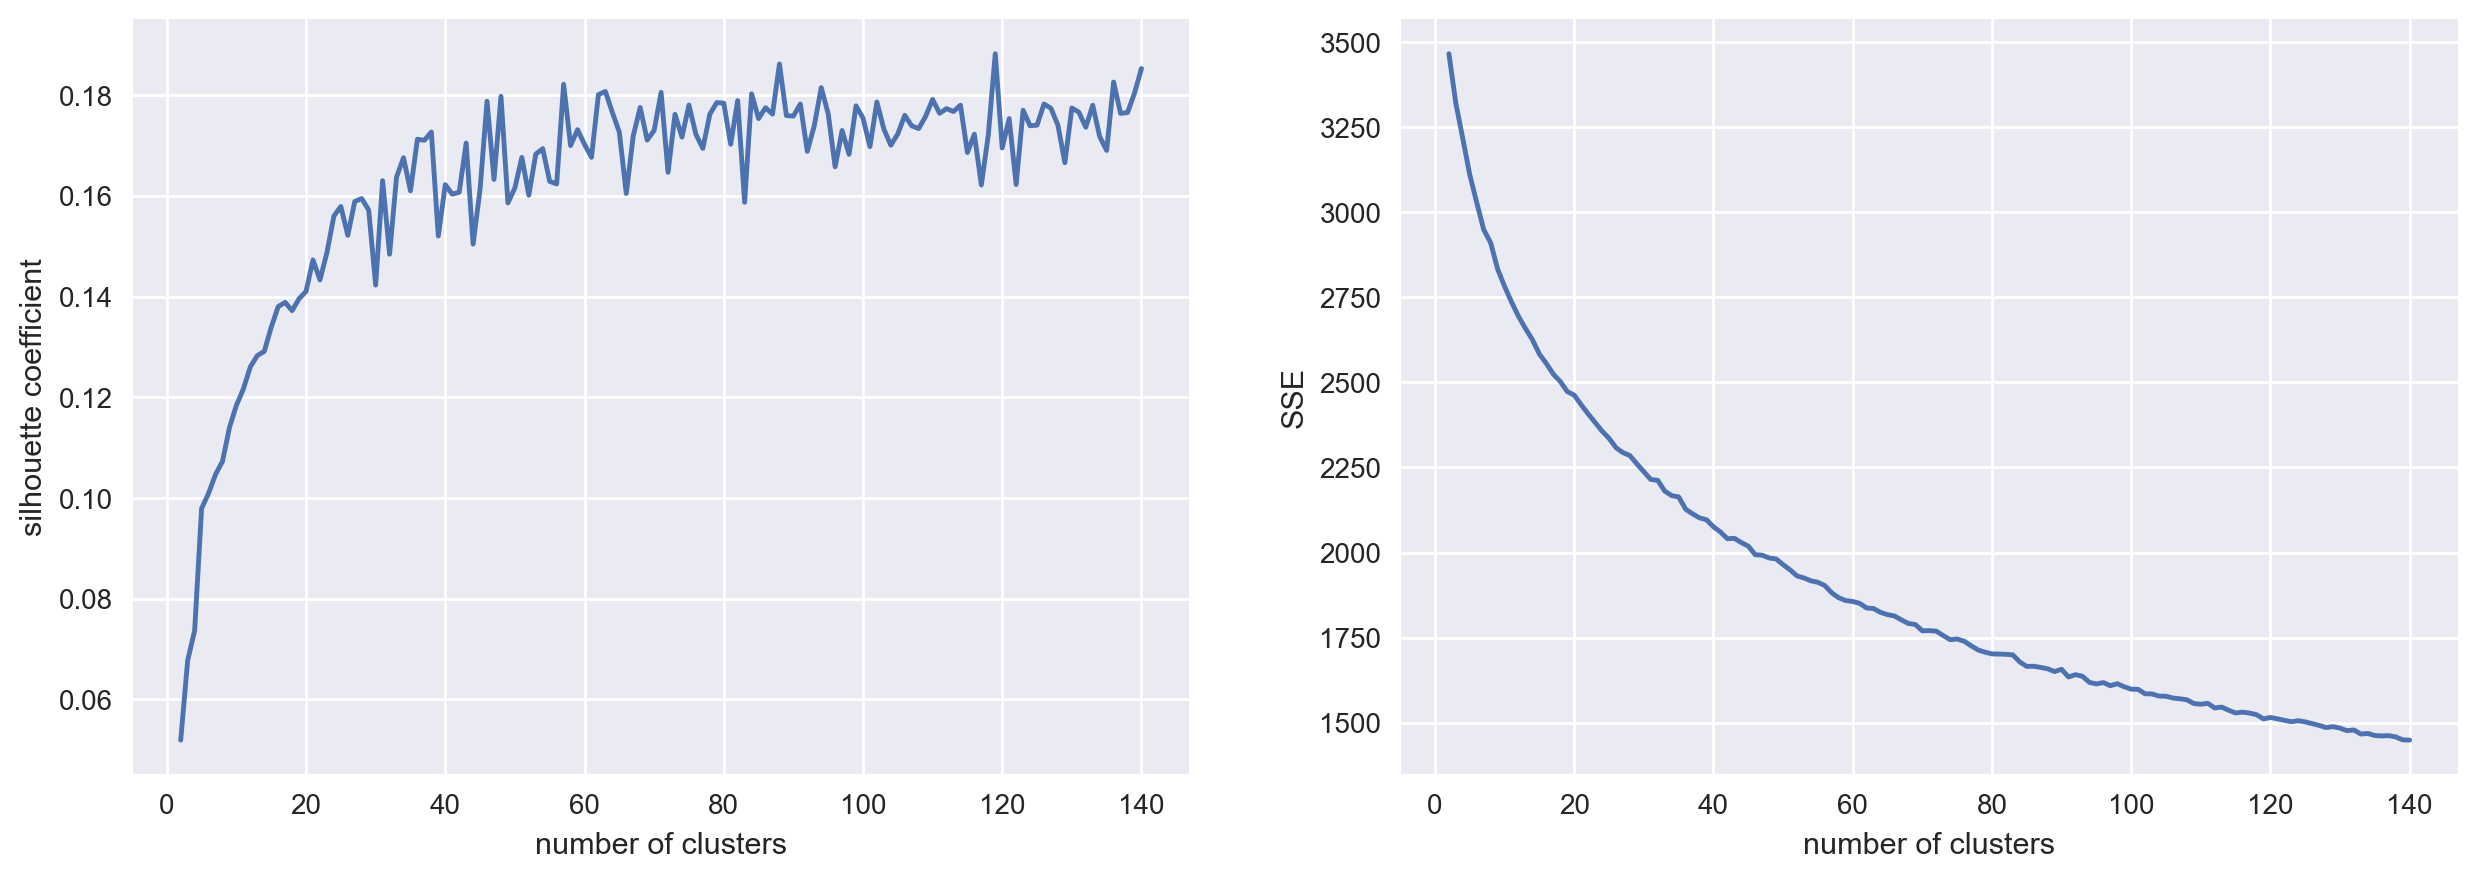

In [99]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,141)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [100]:
import os

os.system('say "Job\'s done"')

0

In [101]:
km = KMeans(n_clusters=119)
clusts = km.fit_predict(corpus_lsa)

In [19]:
len(clusts)

4092

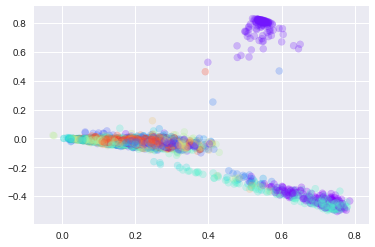

In [26]:
plt.scatter(corpus_lsa[:, 0], corpus_lsa[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)


In [27]:
from sklearn.manifold import TSNE
#Fits t-SNE for visualization
tsne = TSNE(n_components=2)
X_transformed = tsne.fit_transform(corpus_lsa)

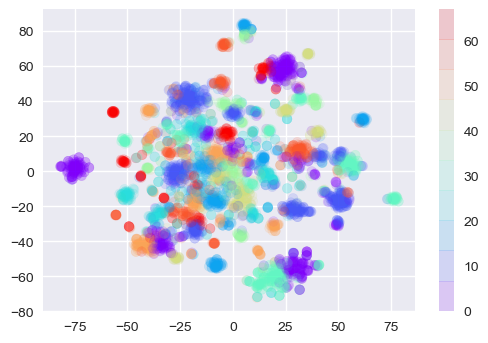

In [28]:
#Graphs t-SNE
plt.figure(dpi=100)

cmap = plt.cm.get_cmap('rainbow', 10)
plt.scatter(X_transformed[:, 0], X_transformed[:,1], c=clusts, cmap=cmap, alpha = 0.15)
#plt.xlim(-20,30)
#plt.ylim(-30,-10)
plt.colorbar()
plt.clim()

In [102]:
true_df['clusters'] = clusts

In [111]:
with open('true_df_clusts.pkl', 'wb') as picklefile:
        pickle.dump(true_df, picklefile)

In [2]:
true_df = pickle.load(open("pickle_files/true_df_clusts.pkl", "rb" ))

In [3]:
true_df.head()

,body,num_source,source,title,clusters
0,The following statements were posted to the ve...,2.0,Reuters,"Trump on Twitter (June 6): Mitch McConnell, Jo...",73
1,"TEL AVIV (Reuters) - Donald Trump’s attorney, ...",2.0,Reuters,Giuliani says Mueller's investigators trying t...,86
2,WASHINGTON (Reuters) - U.S. House of Represent...,2.0,Reuters,House Speaker doubtful of NAFTA passage in cur...,60
3,BRUSSELS (Reuters) - U.S. Defense Secretary Ji...,2.0,Reuters,"In Europe, Mattis is in familiar spot: calming...",70
4,"WASHINGTON/MORRISTOWN, N.J. (Reuters) - A lawy...",2.0,Reuters,Lawyer to ex-Trump campaign aide Manafort taps...,86


In [4]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [5]:
true_df.clusters.value_counts()

5      140
28     130
57     117
11     117
9       96
23      88
64      86
110     80
47      74
19      71
35      68
106     65
6       64
52      63
115     61
71      57
3       54
36      53
24      51
7       51
15      47
0       44
73      43
39      42
21      41
1       41
75      41
46      40
42      40
101     40
      ... 
50      18
31      17
77      17
62      16
84      16
65      16
87      15
12      15
66      15
45      15
98      13
85      13
20      13
111     13
53      12
40      12
103     12
104     11
96      11
108     10
76      10
97       9
88       9
14       8
17       7
55       6
93       5
102      4
112      4
8        2
Name: clusters, Length: 119, dtype: int64

In [104]:
for x in range(119):
    largest = true_df['clusters'] == x
    clust_x_df = true_df[largest]
    print("Cluster {}\n".format(x), clust_x_df.source.value_counts())

Cluster 0
 Reuters            36
Huffington Post     3
Breitbart           2
Mother Jones        1
Daily Beast         1
Info wars           1
Name: source, dtype: int64
Cluster 1
 National Review    9
Breitbart          8
Mother Jones       7
Huffington Post    5
Global Research    5
Reuters            4
Activist Post      2
Info wars          1
Name: source, dtype: int64
Cluster 2
 Info wars    31
Name: source, dtype: int64
Cluster 3
 Mother Jones       26
Huffington Post    10
Breitbart           6
Info wars           6
Daily Beast         3
National Review     2
Reuters             1
Name: source, dtype: int64
Cluster 4
 Alabama Today    26
Name: source, dtype: int64
Cluster 5
 Alabama Today    140
Name: source, dtype: int64
Cluster 6
 Reuters            50
Global Research     4
Breitbart           3
Activist Post       3
Mother Jones        1
Alabama Today       1
Huffington Post     1
Daily Beast         1
Name: source, dtype: int64
Cluster 7
 Reuters            19
National Revie

In [6]:
reference = true_df[['source','clusters']].pivot_table(index='clusters', columns='source', aggfunc=len)

In [7]:
X = true_df.clusters
y = true_df.source
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [22]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

models = [RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10), DecisionTreeClassifier(max_depth=None), 
          BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, n_jobs=-1),
          SVC(probability=True), LogisticRegression(C=0.1), SGDClassifier(loss='log', random_state=42, alpha=0.01)]
model_names = ["Random Forest", "Decision Tree",'Bagging Classifier','SVC','Logistic','SGD-Log']

In [18]:
dumb = DummyClassifier(strategy = "stratified", random_state=0)
dumb.fit(X_train, y_train)
print(dumb.score(X_test, y_test))
print(dumb.score(X_train, y_train))

0.10989010989010989
0.10388023220287199


In [8]:
lm1 = LogisticRegression(C=1000)
lm1.fit(X_train, y_train)
print(lm1.score(X_test, y_test))
print(lm1.score(X_train, y_train))

0.16361416361416362
0.1625420103880232


In [ ]:
rf2 = pickle.load(open("pickle_files/rf2.pkl", "rb" ))

In [11]:
dt = pickle.load(open("pickle_files/dt.pkl", "rb" ))

In [ ]:
bc = pickle.load(open("pickle_files/bc.pkl", "rb" ))

In [13]:
rf2 = RandomForestClassifier(n_estimators=50, max_depth=15)
rf2.fit(X_train, y_train)
print(rf2.score(X_test, y_test))
print(rf2.score(X_train, y_train))

0.6153846153846154
0.666055606477238


In [28]:
X = X.reshape(-1, 1)
cross_val_score(rf2, X, y, cv=10, scoring='accuracy')

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([0.65217391, 0.59806295, 0.62864078, 0.66990291, 0.65776699,
       0.66666667, 0.6495098 , 0.60987654, 0.62128713, 0.61881188])

In [42]:
with open('rf2.pkl', 'wb') as picklefile:
        pickle.dump(rf2, picklefile)

In [49]:
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
print(dt.score(X_train, y_train))

0.6190476190476191
0.6712496180873816


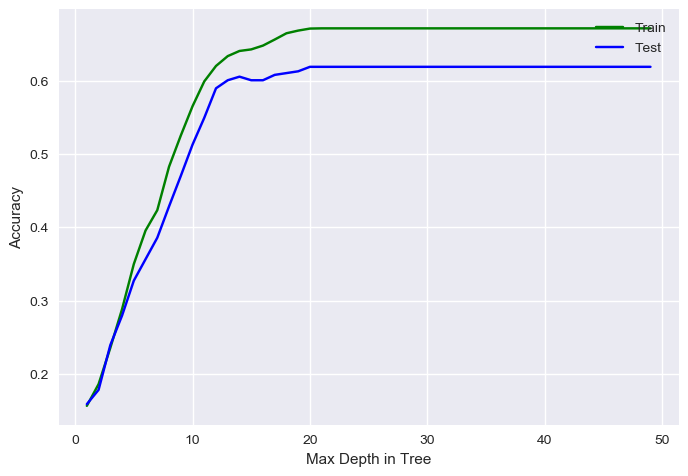

In [35]:
train_score = []
test_score = []

for depth in range(1, 50):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(1, 50), train_score, 'g', label="Train")
plt.plot(range(1, 50), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

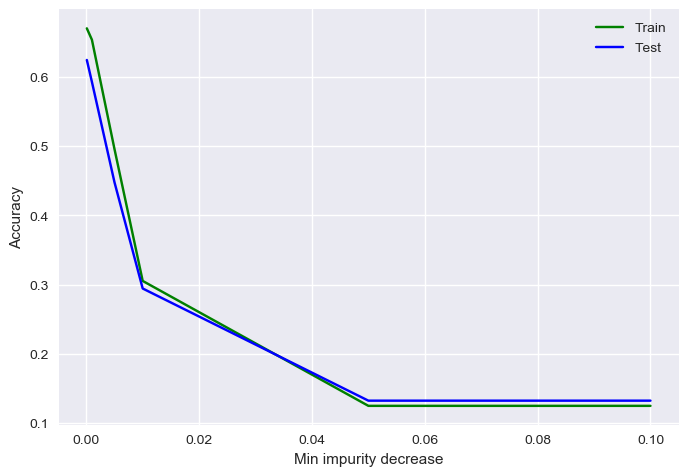

In [47]:
train_score = []
test_score = []
impurity_decrease = [.1, .05, .01, .005, .001, .0001, .0001]
for purity in impurity_decrease:
    dt = DecisionTreeClassifier(max_depth=20, min_impurity_decrease=purity)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(impurity_decrease, train_score, 'g', label="Train")
plt.plot(impurity_decrease, test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Min impurity decrease")
plt.ylabel("Accuracy");

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_imp

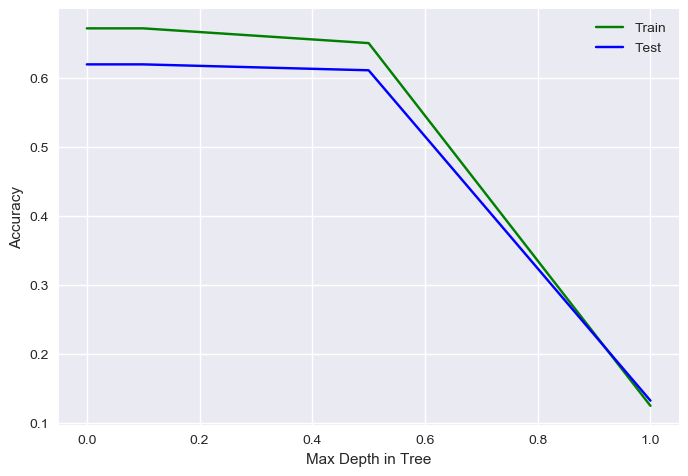

In [48]:
train_score = []
test_score = []
impurity_split = [1, .5, .1, .05, .01, .005, .001, .0001, .0001]
for purity in impurity_split:
    dt = DecisionTreeClassifier(max_depth=20, min_impurity_split=purity)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(impurity_split, train_score, 'g', label="Train")
plt.plot(impurity_split, test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

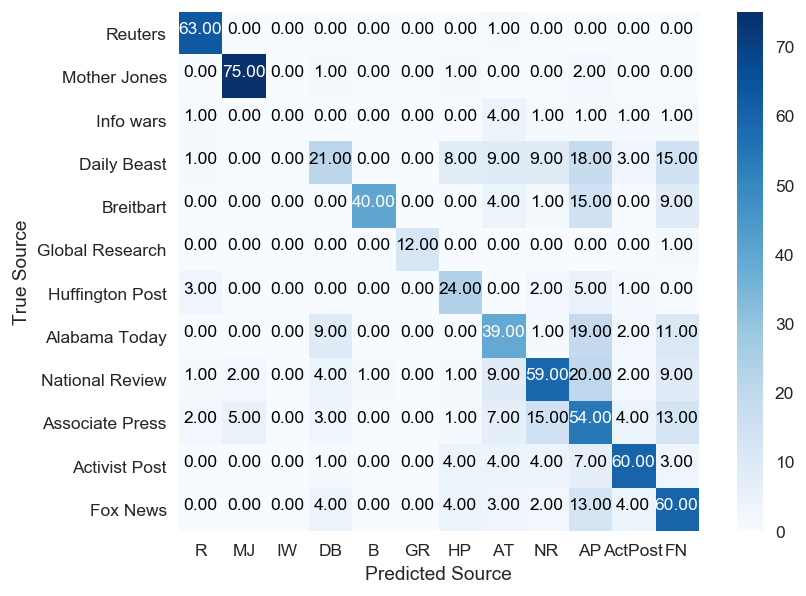

In [68]:
names = ['Reuters', 'Mother Jones', 'Info wars', 'Daily Beast', 'Breitbart',
       'Global Research', 'Huffington Post', 'Alabama Today',
       'National Review', 'Associate Press', 'Activist Post', 'Fox News']
plt.figure(dpi=125)
cm = confusion_matrix(y_test, dt.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('R', 'MJ', 'IW', 'DB', 'B',
       'GR', 'HP', 'AT',
       'NR', 'AP', 'ActPost', 'FN'))
plt.yticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('Reuters', 'Mother Jones', 'Info wars', 'Daily Beast', 'Breitbart',
       'Global Research', 'Huffington Post', 'Alabama Today',
       'National Review', 'Associate Press', 'Activist Post', 'Fox News'));
plt.ylabel("True Source")
plt.xlabel("Predicted Source");
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [29]:
X = X.reshape(-1, 1)
cross_val_score(dt, X, y, cv=10, scoring='accuracy')

array([0.65942029, 0.62227603, 0.6407767 , 0.65776699, 0.66019417,
       0.67647059, 0.64215686, 0.60246914, 0.65346535, 0.61881188])

In [69]:
print("Random Forest classification report\n",classification_report(y_test, rf2.predict(X_test)))
print("Bagging Classifier classification report\n",classification_report(y_test, bc.predict(X_test)))
print("Decision Tree classification report\n", classification_report(y_test, dt.predict(X_test)))

Random Forest classification report
                  precision    recall  f1-score   support

  Activist Post       0.91      0.98      0.95        64
  Alabama Today       0.91      0.95      0.93        79
Associate Press       0.00      0.00      0.00         9
      Breitbart       0.47      0.23      0.31        84
    Daily Beast       0.98      0.58      0.73        69
       Fox News       1.00      0.92      0.96        13
Global Research       0.56      0.69      0.62        35
Huffington Post       0.48      0.46      0.47        81
      Info wars       0.58      0.55      0.56       108
   Mother Jones       0.36      0.53      0.43       104
National Review       0.78      0.72      0.75        83
        Reuters       0.48      0.67      0.56        90

    avg / total       0.63      0.62      0.61       819

Bagging Classifier classification report
                  precision    recall  f1-score   support

  Activist Post       0.91      0.98      0.95        64
  Ala

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
for x in range(50):
    dt = DecisionTreeClassifier(max_depth=25)
    dt.fit(X_train, y_train)
    print(dt.score(X_test, y_test))
    print(dt.score(X_train, y_train))

In [70]:
dt.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [40]:
with open('dt.pkl', 'wb') as picklefile:
        pickle.dump(dt, picklefile)

In [83]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file="tree.dot") 

In [113]:
dt.predict(78)
    

array(['Reuters'], dtype=object)

In [ ]:
len(check)

In [15]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
bc.fit(X_train, y_train)
print(bc.score(X_test, y_test))
print(bc.score(X_train, y_train))

0.6190476190476191
0.6712496180873816


In [30]:
X = X.reshape(-1, 1)
cross_val_score(bc, X, y, cv=10, scoring='accuracy')

array([0.66183575, 0.62469734, 0.63834951, 0.66990291, 0.65776699,
       0.67156863, 0.64215686, 0.60987654, 0.65594059, 0.62128713])

In [59]:
with open('bc.pkl', 'wb') as picklefile:
        pickle.dump(bc, picklefile)

In [67]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.249
                 precision    recall  f1-score   support

  Activist Post       0.23      0.74      0.34        95
  Alabama Today       0.24      0.89      0.38        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.53      0.40      0.46       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.58      0.11      0.19        98
        Reuters       0.18      0.27      0.21       104

    avg / total       0.20      0.25      0.17       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


Accuracy: 0.133
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.38      0.06      0.10       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.13      0.99      0.23       104

    avg / total       0.06      0.13      0.04       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


Accuracy: 0.122
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.12      1.00      0.22       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.00      0.00      0.00       104

    avg / total       0.01      0.12      0.03       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import scale

model = LinearSVC()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))



Accuracy: 0.117
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.08      0.75      0.15        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.19      0.49      0.28       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.00      0.00      0.00       104

    avg / total       0.03      0.12      0.05       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
model = SVC()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.596
                 precision    recall  f1-score   support

  Activist Post       0.86      0.95      0.90        95
  Alabama Today       0.90      0.92      0.91        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.57      0.21      0.30        63
    Daily Beast       1.00      0.51      0.67        75
       Fox News       1.00      0.96      0.98        25
Global Research       0.68      0.68      0.68        37
Huffington Post       0.51      0.45      0.47        74
      Info wars       0.58      0.46      0.51       100
   Mother Jones       0.26      0.59      0.36        85
National Review       0.84      0.60      0.70        98
        Reuters       0.43      0.51      0.47       104

    avg / total       0.66      0.60      0.61       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [80]:
knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=13)
knn.fit(X_train, y_train) 
## And score it on your testing data.
knn.score(X_test, y_test)

0.6214896214896215

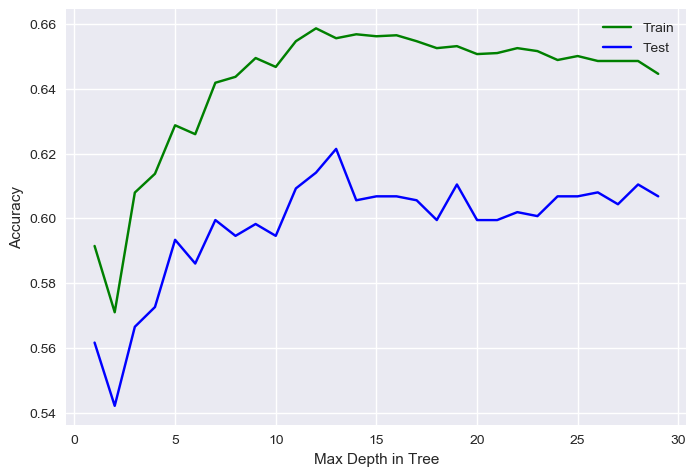

In [79]:
train_score = []
test_score = []

for neighbors in range(1, 30):
    knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(1, 30), train_score, 'g', label="Train")
plt.plot(range(1, 30), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

In [71]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [81]:
print("Accuracy: %.3f"% accuracy_score(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

Accuracy: 0.621
                 precision    recall  f1-score   support

  Activist Post       0.82      0.98      0.89        64
  Alabama Today       1.00      0.92      0.96        79
Associate Press       0.00      0.00      0.00         9
      Breitbart       0.52      0.30      0.38        84
    Daily Beast       0.87      0.58      0.70        69
       Fox News       1.00      0.92      0.96        13
Global Research       0.56      0.69      0.62        35
Huffington Post       0.53      0.44      0.48        81
      Info wars       0.61      0.62      0.61       108
   Mother Jones       0.36      0.50      0.42       104
National Review       0.74      0.72      0.73        83
        Reuters       0.49      0.63      0.55        90

    avg / total       0.63      0.62      0.62       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
os.system('say "Your move.....Commander"')